In [85]:
import cv2

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
img = cv2.imread("./test/dq.jpg")

In [88]:
img.shape

(648, 500, 3)

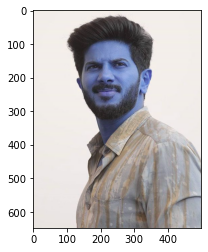

In [89]:
plt.imshow(img)

In [90]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(648, 500)

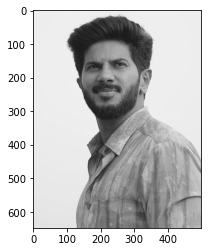

In [91]:
plt.imshow(gray,cmap="gray")

In [92]:
face_cascade = cv2.CascadeClassifier("./Opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./Opencv/haarcascades/haarcascade_eye.xml")


In [93]:
face = face_cascade.detectMultiScale(gray,1.3,5)
face

array([[117,  86, 204, 204]])

In [94]:
(x,y,w,h) = face[0]

In [95]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

In [96]:
roi_gray = gray[y:y+h,x:x+w]
roi_color = face_img[y:y+h,x:x+w]

In [97]:
eyes = eye_cascade.detectMultiScale(roi_gray)
eyes

array([[111,  50,  50,  50],
       [ 38,  60,  48,  48]])

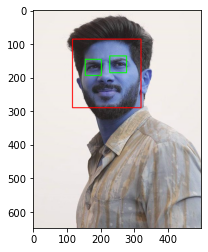

In [98]:
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.imshow(face_img)
    

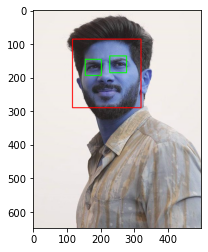

In [99]:
face = face_cascade.detectMultiScale(gray,1.3,5)
(x,y,w,h) = face[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
roi_gray = gray[y:y+h,x:x+w]
roi_color = face_img[y:y+h,x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.figure()    
plt.imshow(face_img,cmap="gray")
plt.show()


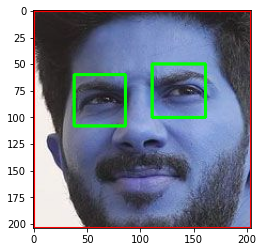

In [100]:
plt.imshow(roi_color)

In [101]:
def get_cropped_img_if_2_eyes(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in face:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    

In [102]:
get = get_cropped_img_if_2_eyes("./test/dq.jpg")

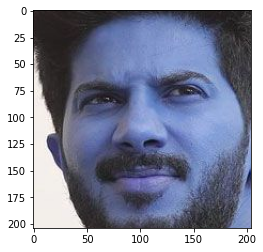

In [103]:
plt.imshow(get)

In [104]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [105]:
import os

In [106]:
img_dirs = []
for i in os.scandir(path_to_data):
    if i.is_dir():
        img_dirs.append(i.path)

In [107]:
img_dirs

['./dataset/dulquer salmaan',
 './dataset/mammootty',
 './dataset/mohanlal',
 './dataset/tovino thomas']

In [108]:
import shutil

In [109]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)

In [110]:
cropped_img_dirs = []
cel_file_name_dic = {}
for i in img_dirs:
    count = 1
    cel_names = i.split("/")[-1]
    cel_names = cel_names.replace(" ","")
    cel_file_name_dic[cel_names] = []
    print(cel_names+"---------------------------------------------")
    for x in os.scandir(i):
        roi_color = get_cropped_img_if_2_eyes(x.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + "/" + cel_names
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
            cropped_file_name = cel_names + str(count)+".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            cel_file_name_dic[cel_names].append(cropped_file_path)
            count = count+1
            
            
                
                

dulquersalmaan---------------------------------------------
mammootty---------------------------------------------
mohanlal---------------------------------------------
tovinothomas---------------------------------------------


In [111]:
crp_img_dirs = []
for i in os.scandir(path_to_cr_data):
    if i.is_dir():
        crp_img_dirs.append(i.path)

In [112]:
crp_img_dirs

['./dataset/cropped/dulquersalmaan',
 './dataset/cropped/mammootty',
 './dataset/cropped/mohanlal',
 './dataset/cropped/tovinothomas']

In [114]:
cel_file_name_dic = {}
for img_dir in crp_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    cel_file_name_dic[celebrity_name] = file_list
cel_file_name_dic

{'dulquersalmaan': ['./dataset/cropped/dulquersalmaan\\dulquersalmaan1.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan11.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan12.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan13.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan14.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan15.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan16.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan17.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan19.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan2.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan20.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan22.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan23.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan24.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan25.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan26.png',
  './dataset/cropped/dul

In [115]:
import pywt

In [116]:
def w2d(img,mode = "haar" , level =1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    
    imArray = np.float32(imArray)
    imArray /= 255;
    
    
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    
    coeffs_h = list(coeffs)
    coeffs_h[0] *= 0;
    
    imArray_h = pywt.waverec2(coeffs_h,mode)
    imArray_h *= 255;
    
    imArray_h = np.uint8(imArray_h)
    
    return imArray_h

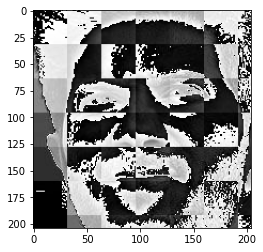

In [117]:
kk = w2d(get,"db1",5)
plt.imshow(kk,cmap="gray")

In [118]:
cel_file_name_dic

{'dulquersalmaan': ['./dataset/cropped/dulquersalmaan\\dulquersalmaan1.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan11.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan12.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan13.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan14.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan15.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan16.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan17.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan19.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan2.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan20.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan22.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan23.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan24.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan25.png',
  './dataset/cropped/dulquersalmaan\\dulquersalmaan26.png',
  './dataset/cropped/dul

In [119]:
cel_name_class = {}
count = 0
for i in cel_file_name_dic.keys():
    cel_name_class[i] = count
    count = count + 1

In [120]:
x,y = [],[]
for cel_namess,training_file in cel_file_name_dic.items():
    for i in training_file:
        img = cv2.imread(i)
        scaled_img = cv2.resize(img,(32,32))
        img_har = w2d(img,"db1",5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        comined = np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(comined)
        y.append(cel_name_class[cel_namess])
        
        
        

In [121]:
cel_name_class

{'dulquersalmaan': 0, 'mammootty': 1, 'mohanlal': 2, 'tovinothomas': 3}

In [122]:
len(x[0])

4096

In [123]:
x = np.array(x).reshape(len(x),4096).astype(float)

In [124]:
x.shape

(218, 4096)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [127]:
pipe = Pipeline([("scalar" , StandardScaler()) , ("model" , SVC(kernel="rbf"))])

In [128]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('model', SVC())])

In [129]:
pipe.score(X_test,y_test)

0.6136363636363636

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.40      0.25      0.31         8
           2       0.74      0.82      0.78        17
           3       0.71      0.45      0.56        11

    accuracy                           0.61        44
   macro avg       0.58      0.57      0.55        44
weighted avg       0.62      0.61      0.60        44



In [132]:
cm = confusion_matrix(y_test,pipe.predict(X_test))

<AxesSubplot:>

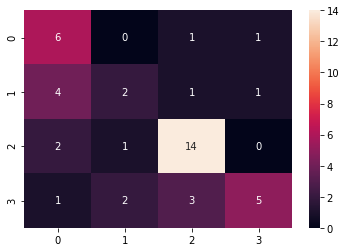

In [133]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [134]:
cel_name_class

{'dulquersalmaan': 0, 'mammootty': 1, 'mohanlal': 2, 'tovinothomas': 3}

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
model_param = {
    "svm" : {
        "model" : SVC(gamma="auto",probability=True),
        "params" : {
          'svc__C': [1,10,100,1000],
          'svc__kernel': ['rbf','linear']  
        }
    },
    
    "Random Forest" : {
        
        "model" : RandomForestClassifier(),
    "params" : {
        'randomforestclassifier__n_estimators': [1,5,10]
    }
    },
    
    "Loistic Regression" : { 
        "model" : LogisticRegression(),
    "params" : {
        'logisticregression__C': [1,5,10]
    }
    }
}

In [137]:
model_param

{'svm': {'model': SVC(gamma='auto', probability=True),
  'params': {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['rbf', 'linear']}},
 'Random Forest': {'model': RandomForestClassifier(),
  'params': {'randomforestclassifier__n_estimators': [1, 5, 10]}},
 'Loistic Regression': {'model': LogisticRegression(),
  'params': {'logisticregression__C': [1, 5, 10]}}}

In [138]:
scores = []
best_estimator = {}
for algo,mp in model_param.items():
    pipe = make_pipeline(StandardScaler(), mp["model"])
    gv = GridSearchCV(pipe, mp["params"],cv=5,return_train_score=False)
    gv.fit(X_train,y_train)
    scores.append({
        "model" : algo,
        "best score" : gv.best_score_,
        "best params" : gv.best_params_
    })
    
    best_estimator[algo] = gv.best_estimator_
    
df = pd.DataFrame(scores,columns=["model","best score","best params"])
df
    
    

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,model,best score,best params
0,svm,0.735630,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,Random Forest,0.522689,{'randomforestclassifier__n_estimators': 10}
2,Loistic Regression,0.735798,{'logisticregression__C': 5}


In [139]:
best_estimator["svm"].score(X_test,y_test)

0.7272727272727273

In [140]:
best_estimator["Random Forest"].score(X_test,y_test)

0.4772727272727273

In [141]:
best_estimator["Loistic Regression"].score(X_test,y_test)

0.7045454545454546

In [142]:
model_svm = best_estimator["svm"]

In [143]:
cm = confusion_matrix(y_test,model_svm.predict(X_test))

<AxesSubplot:>

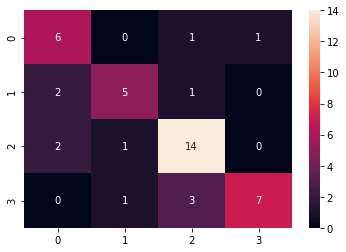

In [144]:
sns.heatmap(cm,annot=True)

In [145]:
!pip install joblib
import joblib 

In [146]:
joblib.dump(model_svm,'saved_model.pkl')

['saved_model.pkl']

In [148]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(cel_name_class))